<a href="https://colab.research.google.com/github/bsjin1122/deep-learning/blob/main/03_keras/keras_funcational_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 함수형 API(Functional API)
- 함수 형태로 모델을 정의하면 다양한 모델 구조를 구현할 수 있다.
여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의할 수 있다.
  - 함수의 입력 매개변수를 여러 개 갖는 `다중 입력`

  - 함수의 return 값을 여러 개 갖는 다중 출력
  - 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조 등 가능

## Sequential API
- 단반향의 Sequential 모델만 구현 가능하다는 제약
- 데이터 흐름이 특정 레이어를 건너 뛰거나, 병합 및 분리 등의 구조 모델을 구현할 수는 없다.

In [2]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])


In [4]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [5]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


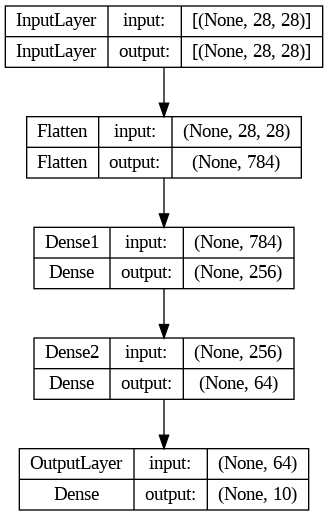

In [6]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')


In [7]:

# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2134 - accuracy: 0.9362
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9808
Functional Model] loss: 0.07879, acc: 0.97720


# 모델 서브클래싱

In [9]:
class MyModel(tf.keras.Model):

    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


    # call() 메소드는 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수이다.
    # - call() 함수 내부에서는 모델의 입력부터 출력까지의 흐름, 즉 순전파를 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결한다.
    # - 마지막으로 최종 출력값을 return한다.


In [10]:
# 모델 생성
mymodel = MyModel() #생성자로 인스턴스 생성

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28))) #input_shape이 정의되지 않아 전체 모델의 구조를 생성해내지 못한다.

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')


Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2118 - accuracy: 0.9384
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0865 - accuracy: 0.9736
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0593 - accuracy: 0.9813
Subclassing Model] loss: 0.07309, acc: 0.97740


## 서브클래싱 모델 파라미터를 활용한 생성

- 동적으로 유닛 개수 초기화하기

In [12]:
class MyModel(tf.keras.Model):

    # 생성자 parameter 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [13]:

# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()


Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [14]:

# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2135 - accuracy: 0.9365
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0872 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0604 - accuracy: 0.9810
Subclassing Model w. parameters] loss: 0.08455, acc: 0.97560
